# 04 Setting the initial SoC

Setting the initial SoC for your pack is performed with an argument passed to the solve algorithm. Currently the same value is applied to each battery but in future it will be possible to vary the SoC across the pack.

In [1]:
try:
    import liionpack as lp
except:
    !pip install -q git+https://github.com/pybamm-team/liionpack.git@main
    import liionpack as lp
import pybamm
import numpy as np
import matplotlib.pyplot as plt

Lets set up the most simple pack possible with one battery and very low busbar resistance to compare to a pure PyBaMM simulation

In [2]:
Rsmall = 1e-6

In [3]:
netlist = lp.setup_circuit(Np=1, Ns=1, Rb=Rsmall, Rc=Rsmall, Ri=5e-2, V=4.0, I=1.0)

In [4]:
# PyBaMM parameters
chemistry = pybamm.parameter_sets.Chen2020
parameter_values = pybamm.ParameterValues(chemistry=chemistry)

In [5]:
# Cycling experiment
experiment = pybamm.Experiment(
    [
        (
            "Discharge at 1 A for 1000 s or until 3.3 V",
            "Rest for 1000 s",
            "Charge at 1 A for 1000 s or until 4.0 V",
            "Rest for 1000 s",
        )
    ]
    * 3,
    period="10 s",
)

In [6]:
SoC = 0.5

In [7]:
# Solve pack
output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    initial_soc=SoC,
)

Stepping simulation: 100%|████████████████████████████████████████████████████████| 1201/1201 [00:09<00:00, 132.20it/s]


Let's compare to the PyBaMM simulation

In [8]:
parameter_values = pybamm.ParameterValues(chemistry=chemistry)
parameter_values.update({"Total heat transfer coefficient [W.m-2.K-1]": 10.0})
sim = pybamm.Simulation(
    model=pybamm.lithium_ion.SPM(),
    experiment=experiment,
    parameter_values=parameter_values,
)

In [9]:
sol = sim.solve(initial_soc=SoC)

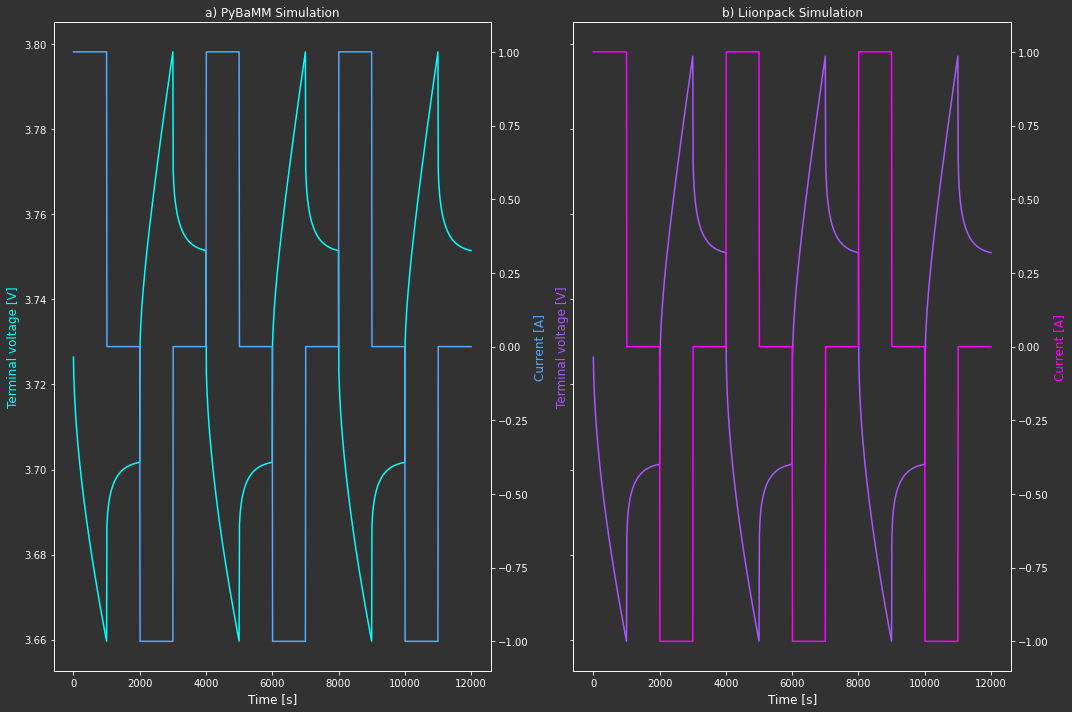

In [10]:
lp.compare_solution_output(sol, output)

Now lets start the simulation from a different state of charge

In [11]:
SoC = 0.25

In [12]:
# Solve pack
output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    initial_soc=SoC,
)

Stepping simulation: 100%|████████████████████████████████████████████████████████| 1201/1201 [00:08<00:00, 136.45it/s]


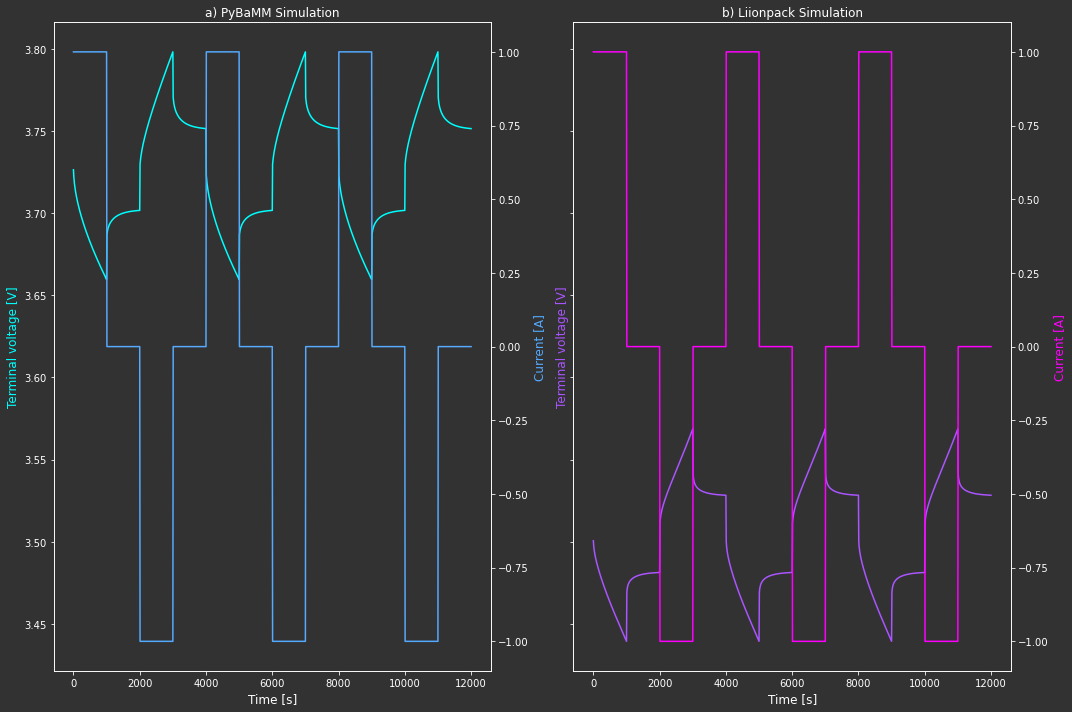

In [13]:
lp.compare_solution_output(sol, output)

Here we are still comparing to the PyBaMM simulation at 0.5 SoC and we can see that liionpack started at a lower voltage corresponding to a lower SoC.

In [14]:
parameter_values = pybamm.ParameterValues(chemistry=chemistry)
sim = pybamm.Simulation(
    model=pybamm.lithium_ion.SPM(),
    experiment=experiment,
    parameter_values=parameter_values,
)
sol = sim.solve(initial_soc=SoC)

Now we can re-run the PyBaMM simulation and compare again

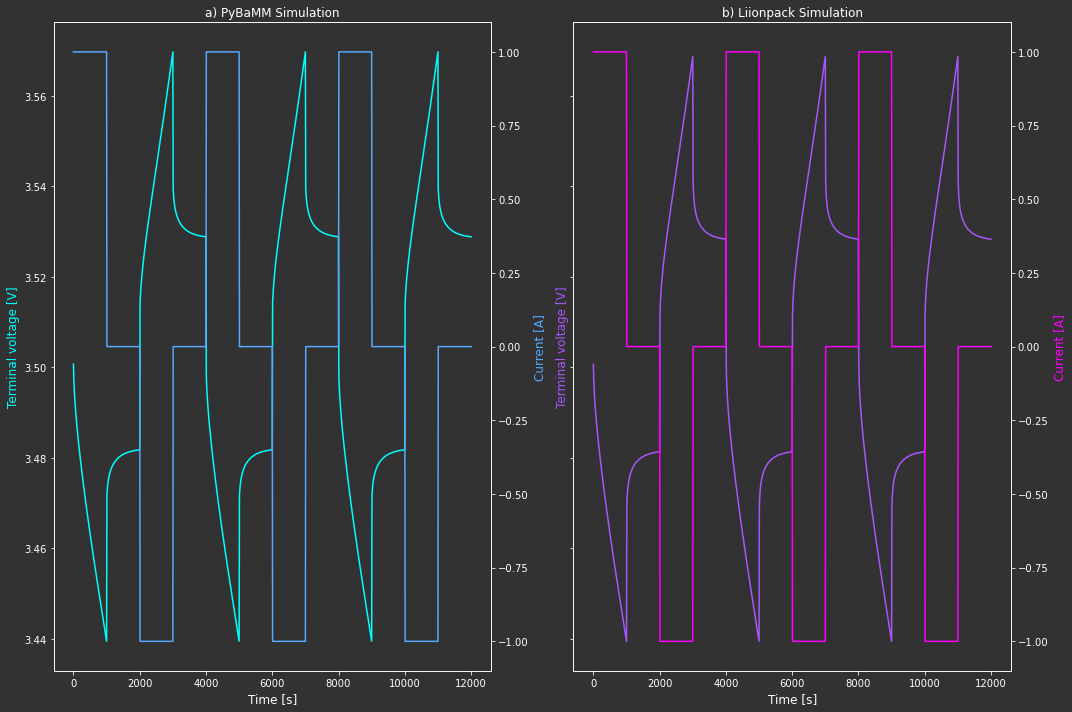

In [15]:
lp.compare_solution_output(sol, output)

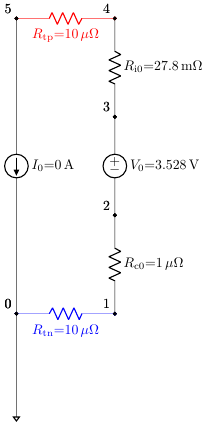

In [16]:
lp.draw_circuit(netlist, dpi=100,)